In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression              # for simulating data     # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics D
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
# Create a synthetic regression dataset
n_samples = 200
n_features = 4
n_targets = 1

x, y = make_regression(n_samples=n_samples, n_features=n_features, 
                       n_targets=n_targets, noise=25, random_state=52)

print(x.shape,y.shape)

(200, 4) (200,)


In [42]:
print("This is x",x )
print("This is y",y )

This is x [[-0.60889302 -1.55539836 -0.06615728 -0.4018704 ]
 [-1.36006111  0.55032362  1.02561971 -0.539038  ]
 [ 0.42449357 -0.44715222  2.42242234  0.89861825]
 [ 2.48832803 -1.50341423  1.50300542 -0.9738716 ]
 [-0.77972113 -0.79162028 -1.79189349  0.78398235]
 [-0.72497781  0.02615692  0.15225027 -0.5391378 ]
 [ 0.49256666  1.19145069  0.62739972  1.38944194]
 [-0.43235233 -1.03248999  0.03081222 -0.86342215]
 [ 0.11074069  1.31448326  0.26742158 -1.18780871]
 [ 0.74665143 -1.46221374  1.1385852   0.21029173]
 [ 0.31480994  0.63856574  1.76593788  1.11261944]
 [ 0.0665501  -0.33383062  1.95015893 -0.10925267]
 [-1.0441307  -0.17493588  2.01435588  0.77943819]
 [-1.22769122  1.55606168 -1.83109143  1.39865686]
 [-1.95626229  0.56373159  1.96371926  0.06475498]
 [ 0.50395687  0.93362384 -2.27594004 -0.06536397]
 [-0.10861647 -0.30746727  0.41325278  1.19763019]
 [ 0.69459216  1.1521841  -0.28570368 -0.00729803]
 [ 1.01277865  1.33986234  0.46150358 -0.03986588]
 [ 0.81666895  1.2963

In [43]:
# Split the data into training and testing sets


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print("Train shape  Test Shape  Regular")
print(x_train.shape,"", x_test.shape, "", x.shape)
print(y_train.shape,"", y_test.shape, "", y.shape)
#train_test_split splits the data 80/20 with 20 being the test size



Train shape  Test Shape  Regular
(160, 4)  (40, 4)  (200, 4)
(160,)  (40,)  (200,)


In [44]:
model = LinearRegression() # too easy!

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('This is y_pred shape',y_pred.shape)



This is y_pred shape (40,)


In [45]:
# Combine x and y into a single DataFrame
data = pd.DataFrame({'Feature1': x[:, 0], 'Feature2': x[:, 1], 'Feature3': x[:, 2], 'Feature4': x[:, 3], 'Target': y})
data


,Feature1,Feature2,Feature3,Feature4,Target
0,-0.608893,-1.555398,-0.066157,-0.401870,-217.532125
1,-1.360061,0.550324,1.025620,-0.539038,-129.378751
2,0.424494,-0.447152,2.422422,0.898618,119.109742
3,2.488328,-1.503414,1.503005,-0.973872,-61.575743
4,-0.779721,-0.791620,-1.791893,0.783982,-62.310759
...,...,...,...,...,...
195,0.272183,0.146604,-0.111711,0.875388,120.019080
196,-0.024242,1.628679,-0.826565,-0.366000,86.769882
197,0.732305,-0.969465,-0.648886,-0.040050,-48.267032
198,-0.672567,1.106137,-0.831525,1.024283,104.764107


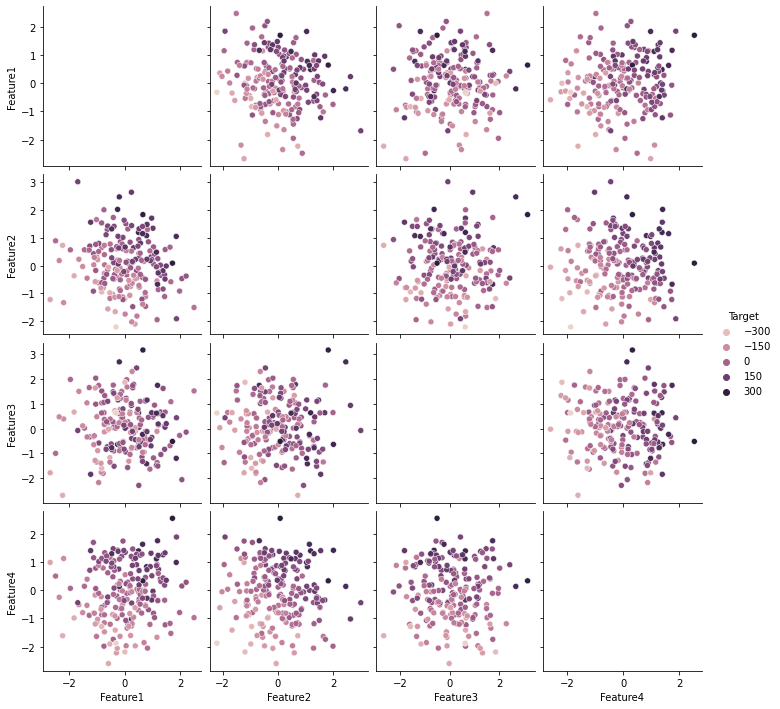

In [46]:
# Create pairwise scatter plots
sns.pairplot(data, hue='Target', markers='o')
plt.show()

In [47]:
# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cor = np.sqrt(r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 703.38
R^2 Score: 0.95
Correlation: 0.98


(300, 2)
(300,)


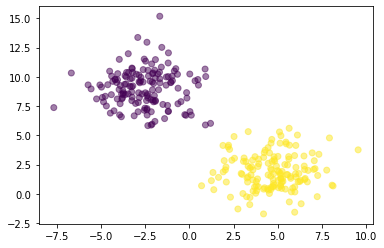

In [60]:
# Create two 2D blobs of data
x, y = make_blobs(n_samples=300, centers=2, 
                 random_state=42, cluster_std=1.6)

print(x.shape)
print(y.shape)

# Plot the blobs of data by splitting the x variable's two columns
plt.scatter(x[:,0], x[:,1], c=y, alpha =.5)


# Split the data into training and test sets (70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

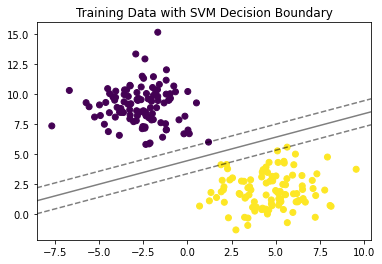

In [49]:
# Create a Support Vector Machine (SVM) classifier and train it on the training data
svm = SVC(kernel='linear', C=1)

svm.fit(x_train, y_train)


# Scatter plot of the test data showing the decision boundary
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis')

# Create the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

plt.title("Training Data with SVM Decision Boundary")
plt.show()

# Make predictions on the test data
y_pred = svm.predict(x_test)



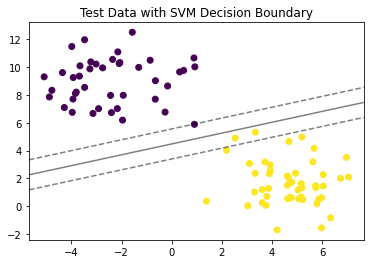

In [50]:
# Scatter plot of the test data showing the decision boundary
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis')

# Create the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title("Test Data with SVM Decision Boundary")
plt.show()


In [51]:
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)
print(acc_score, " | | |", conf_matrix, " | | |")
print(cls_report)

1.0  | | | [[42  0]
 [ 0 48]]  | | |
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        48

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

